In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./train titanic dataset.csv')

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.fillna({'Age': 29.699118}, inplace = True)

In [15]:
mode_value = df['Cabin'].mode()[0]
df['Cabin'] =  df['Cabin'].fillna(mode_value)

In [17]:
mode_value = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_value)

In [19]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [21]:
duplicate_count = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_count}")

number of duplicate rows: 0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
gender_map = {'female':1, 'male':0}
df['Sex'] = df['Sex'].map(gender_map)

In [27]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [29]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [31]:
df = pd.get_dummies(df, columns=['Cabin', 'Embarked', 'Ticket'], prefix='loc')

In [33]:
print(df.dtypes)

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
                    ...  
loc_W./C. 6608       bool
loc_W./C. 6609       bool
loc_W.E.P. 5734      bool
loc_W/C 14208        bool
loc_WE/P 5735        bool
Length: 840, dtype: object


In [35]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+).', expand=False)

In [37]:
print(df['Title'].value_counts())

Title
Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Planke           3
Impe             3
Gordon           2
Col              2
Mlle             2
Major            2
Melkebeke        1
Jonkheer         1
Shawah           1
the              1
Velde            1
Capt             1
Messemaeker      1
Carlo            1
Ms               1
Mme              1
Steen            1
Mulder           1
Pelsmaeker       1
Walle            1
der              1
Billiard         1
Don              1
Cruyssen         1
Name: count, dtype: int64


In [39]:
df['Title'] = df['Title'].replace(['Dr','Rev','y','Plank','Impe','Gordon','Col Major','Melkebeke','Jonkheer','Shawah','the','Velde','Capt','Messemaeker','Carlo Steen','Mulder','Pelsmaeker','Walle','der','Billiard','Don','Cruyssen'], 'Rare')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [41]:
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

In [43]:
df = df.drop('Name', axis=1)

In [45]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,loc_A10,loc_A14,...,Title_Col,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Planke,Title_Rare,Title_Steen
0,1,0,3,0,22.000000,1,0,7.2500,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,1,38.000000,1,0,71.2833,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,1,26.000000,0,0,7.9250,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,1,1,1,35.000000,1,0,53.1000,False,False,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,0,35.000000,0,0,8.0500,False,False,...,False,False,False,False,False,True,False,False,False,False
5,6,0,3,0,29.699118,0,0,8.4583,False,False,...,False,False,False,False,False,True,False,False,False,False
6,7,0,1,0,54.000000,0,0,51.8625,False,False,...,False,False,False,False,False,True,False,False,False,False
7,8,0,3,0,2.000000,3,1,21.0750,False,False,...,False,False,True,False,False,False,False,False,False,False
8,9,1,3,1,27.000000,0,2,11.1333,False,False,...,False,False,False,False,False,False,True,False,False,False
9,10,1,2,1,14.000000,1,0,30.0708,False,False,...,False,False,False,False,False,False,True,False,False,False


In [47]:
print(df.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age             float64
                 ...   
Title_Mr           bool
Title_Mrs          bool
Title_Planke       bool
Title_Rare         bool
Title_Steen        bool
Length: 850, dtype: object


In [49]:
df = df.drop('PassengerId', axis=1)

All numeric columns for the heatmap
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


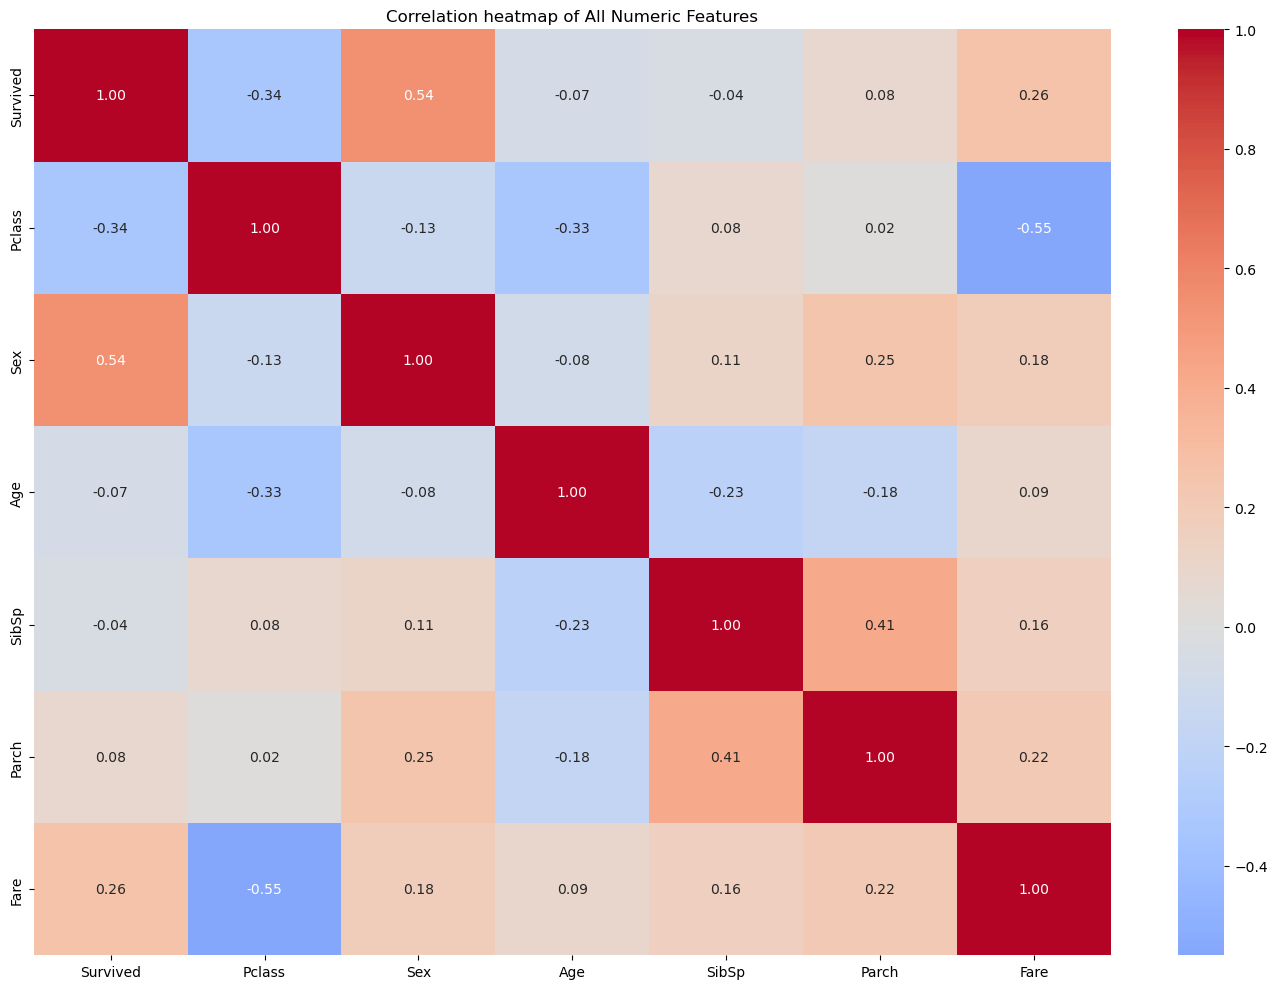

In [53]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('All numeric columns for the heatmap')
print(numeric_columns)

plt.figure(figsize=(14, 10))

correlation = df[numeric_columns].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation heatmap of All Numeric Features')
plt.tight_layout() 

In [55]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split':[2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print('Best parameters found: ', grid_search.best_params_)
print('Best Cross-Validation Accuracy: ', grid_search.best_score_)

final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print('\nFinal Model Accuracy on Test Set: {:.2f}%'.format(final_accuracy * 100))

features_importances = best_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': features_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print('\nTop 10 Most Important Features:')
print(importance_df.head(10))

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy:  0.8524771003644244

Final Model Accuracy on Test Set: 83.24%

Top 10 Most Important Features:
         Feature  Importance
843     Title_Mr    0.119590
1            Sex    0.084633
5           Fare    0.070489
2            Age    0.055234
0         Pclass    0.053449
844    Title_Mrs    0.035619
53   loc_B96 B98    0.033427
3          SibSp    0.031978
841   Title_Miss    0.026824
4          Parch    0.024653


In [86]:
import joblib

joblib.dump(best_model, 'titanic_survival_predictor.pkl')
print("Model saved as 'titanic_survival_predictor.pkl'")

Model saved as 'titanic_survival_predictor.pkl'


In [88]:
!pip freeze > requirements.txt